In [13]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd

In [14]:
data = pd.read_csv('/content/drive/MyDrive/HardwareAcceleraation/Dataset/Kmeans_3D_data.csv')
data.head()

,ID,x,y,Unnamed: 3
0,0,24.412,32.932,NaN
1,1,35.190,12.189,NaN
2,2,26.288,41.718,NaN
3,3,0.376,15.506,NaN
4,4,26.116,3.963,NaN


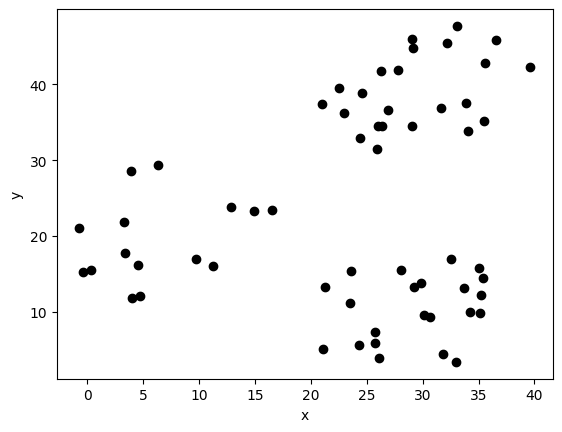

In [16]:
X = data[["x","y"]]
#show data on plot
plt.scatter(X["x"],X["y"],c='black')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

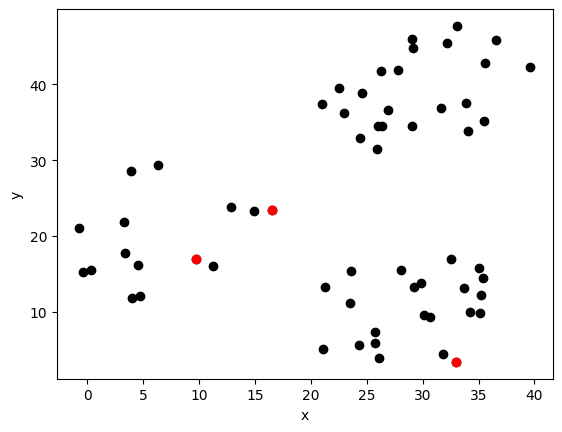

In [18]:
# Step 1 Choose the number of clusters (k)
K=3
# Step 2 select random centroid for each cluster
# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["x"],X["y"],c='black')
plt.scatter(Centroids["x"],Centroids["y"],c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [22]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["x"]-row_d["x"])**2
            d2=(row_c["y"]-row_d["y"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["y","x"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['y'] - Centroids['y']).sum() + (Centroids_new['x'] - Centroids['x']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["y","x"]]



0.0


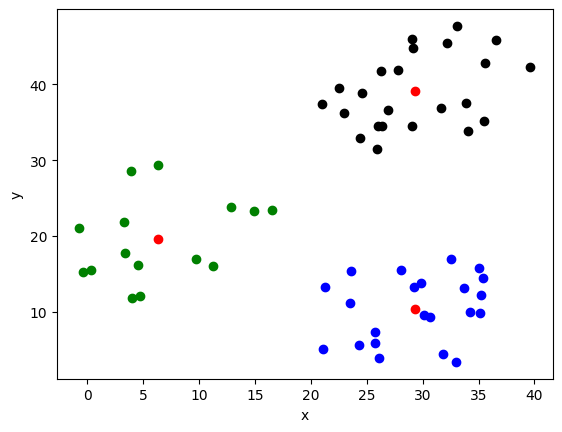

In [26]:
color=['blue','green','black']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["x"],data["y"],c=color[k])
plt.scatter(Centroids["x"],Centroids["y"],c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()